Import packages and read in files from kaggle

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
teams = pd.read_csv('C:\Users\Owner\Desktop\march-machine-learning-mania-2016-v2\Teams.csv')
seasons = pd.read_csv('C:\Users\Owner\Desktop\march-machine-learning-mania-2016-v2\RegularSeasonDetailedResults.csv')
tourney = pd.read_csv('C:\Users\Owner\Desktop\march-machine-learning-mania-2016-v2\TourneyDetailedResults.csv')
seeds = pd.read_csv('C:\Users\Owner\Desktop\march-machine-learning-mania-2016-v2\TourneySeeds.csv')
slots = pd.read_csv('C:\Users\Owner\Desktop\march-machine-learning-mania-2016-v2\TourneySlots.csv')

Rearrange detailed season results by splitting into two data frames, one for losing games and one for winning games.  Renamed columns with standard names and created Winloss column with a 1 for a win and a 0 for a loss and merged with names

In [3]:
wseasons = seasons[seasons.columns[[0,2,3,8,9,10,11,12,13,14,15,16,17,18,19,20]]]
wseasons = wseasons.rename(columns={'Wteam':'Team','Wscore':'Score','Wfgm':'2made','Wfga':'2att',\
                         'Wfgm3':'3made','Wfga3':'3att','Wftm':'1made','Wfta':'1att',\
                         'Wor':'Orebound','Wdr':'Drebound','Wast':'Assist','Wto':'Turnover',\
                         'Wstl':'Steal','Wblk':'Block','Wpf':'Fouls'})
wseasons['Winloss'] =  np.repeat(1,len(wseasons))
lseasons = seasons[seasons.columns[[0,4,5,21,22,23,24,25,26,27,28,29,30,31,32,33]]]
lseasons = lseasons.rename(columns={'Lteam':'Team','Lscore':'Score','Lfgm':'2made','Lfga':'2att',\
                         'Lfgm3':'3made','Lfga3':'3att','Lftm':'1made','Lfta':'1att',\
                         'Lor':'Orebound','Ldr':'Drebound','Last':'Assist','Lto':'Turnover',\
                         'Lstl':'Steal','Lblk':'Block','Lpf':'Fouls'})
lseasons['Winloss'] =  np.repeat(0,len(lseasons))
teamseasons = wseasons.append(lseasons)
teams = teams.rename(columns={'Team_Id':'Team','Team_Name':'Name'})
teamseasons = pd.merge(left=teams, right=teamseasons, how='right', on='Team')
teamseasons.insert(6, '2percent', teamseasons['2made']/teamseasons['2att'])
teamseasons.insert(9, '3percent', teamseasons['3made']/teamseasons['3att'])
teamseasons.insert(12, '1percent', teamseasons['1made']/teamseasons['1att'])
teamseasons.head()

,Team,Name,Season,Score,2made,2att,2percent,3made,3att,3percent,...,1att,1percent,Orebound,Drebound,Assist,Turnover,Steal,Block,Fouls,Winloss
0,1101,Abilene Chr,2014,73,25,53,0.471698,5,14,0.357143,...,24,0.750000,8,22,11,15,12,1,18,1
1,1101,Abilene Chr,2014,87,27,44,0.613636,5,9,0.555556,...,38,0.736842,7,21,12,14,8,3,21,1
2,1101,Abilene Chr,2015,72,23,45,0.511111,7,17,0.411765,...,24,0.791667,10,24,17,17,2,0,23,1
3,1101,Abilene Chr,2015,65,23,54,0.425926,8,24,0.333333,...,18,0.611111,7,19,14,14,7,0,21,1
4,1101,Abilene Chr,2015,69,24,45,0.533333,10,20,0.500000,...,16,0.687500,6,23,15,18,7,2,21,1


Rearrange detailed tourney results by splitting into two data frames, one for losing games and one for winning games. 
Renamed columns with standard names and created Winloss column with a 1 for a win and a 0 for a loss and merged with names

In [4]:
wtourney = tourney[tourney.columns[[0,2,3,8,9,10,11,12,13,14,15,16,17,18,19,20]]]
wtourney = wtourney.rename(columns={'Wteam':'Team','Wscore':'Score','Wfgm':'2made','Wfga':'2att',\
                         'Wfgm3':'3made','Wfga3':'3att','Wftm':'1made','Wfta':'1att',\
                         'Wor':'Orebound','Wdr':'Drebound','Wast':'Assist','Wto':'Turnover',\
                         'Wstl':'Steal','Wblk':'Block','Wpf':'Fouls'})
wtourney['Winloss'] =  np.repeat(1,len(wtourney))
ltourney = tourney[tourney.columns[[0,4,5,21,22,23,24,25,26,27,28,29,30,31,32,33]]]
ltourney = ltourney.rename(columns={'Lteam':'Team','Lscore':'Score','Lfgm':'2made','Lfga':'2att',\
                         'Lfgm3':'3made','Lfga3':'3att','Lftm':'1made','Lfta':'1att',\
                         'Lor':'Orebound','Ldr':'Drebound','Last':'Assist','Lto':'Turnover',\
                         'Lstl':'Steal','Lblk':'Block','Lpf':'Fouls'})
ltourney['Winloss'] =  np.repeat(0,len(ltourney))
teamtourney = wtourney.append(ltourney)
teamtourney = pd.merge(left=teams, right=teamtourney, how='right', on='Team')
teamtourney.insert(6, '2percent', teamtourney['2made']/teamtourney['2att'])
teamtourney.insert(9, '3percent', teamtourney['3made']/teamtourney['3att'])
teamtourney.insert(12, '1percent', teamtourney['1made']/teamtourney['1att'])
teamtourney.head()

,Team,Name,Season,Score,2made,2att,2percent,3made,3att,3percent,...,1att,1percent,Orebound,Drebound,Assist,Turnover,Steal,Block,Fouls,Winloss
0,1102,Air Force,2004,52,17,39,0.435897,8,25,0.320000,...,13,0.769231,2,19,15,16,7,2,15,0
1,1102,Air Force,2006,69,21,41,0.512195,13,27,0.481481,...,18,0.777778,1,14,15,11,7,1,13,0
2,1103,Akron,2009,64,21,57,0.368421,10,23,0.434783,...,18,0.666667,11,15,15,8,0,1,23,0
3,1103,Akron,2011,56,23,64,0.359375,7,21,0.333333,...,6,0.500000,8,24,10,8,6,4,21,0
4,1103,Akron,2013,42,15,43,0.348837,1,13,0.076923,...,19,0.578947,9,20,5,22,2,6,12,0


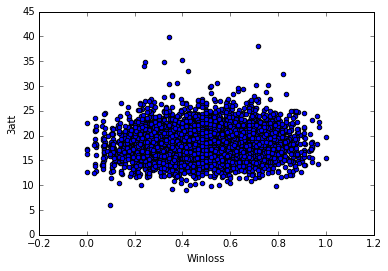

In [17]:
seasonmean = teamseasons.groupby(['Name','Team','Season']).mean()
seasonmean.plot('Winloss','3att',kind='scatter')

In [18]:
tourneymean = teamtourney.groupby(['Name','Team','Season']).mean()
tourneymean.head()

Score  2made  2att  2percent  3made  3att  3percent  \
Name      Team Season                                                        
Air Force 1102 2004     52.0   17.0  39.0  0.435897    8.0  25.0  0.320000   
               2006     69.0   21.0  41.0  0.512195   13.0  27.0  0.481481   
Akron     1103 2009     64.0   21.0  57.0  0.368421   10.0  23.0  0.434783   
               2011     56.0   23.0  64.0  0.359375    7.0  21.0  0.333333   
               2013     42.0   15.0  43.0  0.348837    1.0  13.0  0.076923   

                       1made  1att  1percent  Orebound  Drebound  Assist  \
Name      Team Season                                                      
Air Force 1102 2004     10.0  13.0  0.769231       2.0      19.0    15.0   
               2006     14.0  18.0  0.777778       1.0      14.0    15.0   
Akron     1103 2009     12.0  18.0  0.666667      11.0      15.0    15.0   
               2011      3.0   6.0  0.500000       8.0      24.0    10.0   
               2013     11.0  19.0  0.578947       9.0      20.0     5.0   

                       Turnover  Steal  Block  Fouls  Winloss  
Name      Team Season                                          
Air Force 1102 2004        16.0    7.0    2.0   15.0      0.0  
               2006        11.0    7.0    1.0   13.0      0.0  
Akron     1103 2009         8.0    0.0    1.0   23.0      0.0  
               2011         8.0    6.0    4.0   21.0      0.0  
               2013        22.0    2.0    6.0   12.0      0.0

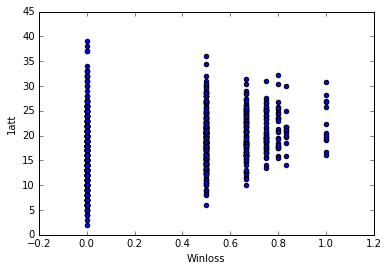

In [25]:
tourneymean.plot('Winloss','1att',kind='scatter')

In [7]:
teamseeds = pd.merge(left=teams, right=seeds, how='right', on='Team')
teamslots = pd.merge(left=teamseeds, right=slots, how='right',left_on=['Season','Seed'], right_on=['Season','Strongseed'])
teamslots = teamslots.rename(columns={'Name':'Strongname'})
teamslots = pd.merge(left=teamseeds, right=teamslots, how='right',left_on=['Season','Seed'], right_on=['Season','Weakseed'])
teamslots = teamslots.rename(columns={'Name':'Weakname'})
teamslots = teamslots[['Season','Slot','Strongseed','Strongname','Weakseed','Weakname']]
teamslots = teamslots[(teamslots['Season'] >= 2003) & ~(pd.isnull(teamslots['Strongname'] )) ]
teamslots.sort_values(['Season','Slot'])

,Season,Slot,Strongseed,Strongname,Weakseed,Weakname
688,2003.0,R1W1,W01,Oklahoma,W16,S Carolina St
220,2003.0,R1W2,W02,Wake Forest,W15,ETSU
400,2003.0,R1W3,W03,Syracuse,W14,Manhattan
44,2003.0,R1W4,W04,Louisville,W13,Austin Peay
90,2003.0,R1W5,W05,Mississippi St,W12,Butler
620,2003.0,R1W6,W06,Oklahoma St,W11,Penn
41,2003.0,R1W7,W07,St Joseph's PA,W10,Auburn
521,2003.0,R1W8,W08,California,W09,NC State
1053,2003.0,R1X1,X01,Texas,X16,NaN
699,2003.0,R1X2,X02,Florida,X15,Sam Houston St


In [26]:
tourney

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
5,2003,136,1163,58,1140,53,N,0,17,52,...,17,11,13,15,26,11,11,8,4,22
6,2003,136,1181,67,1161,57,N,0,19,54,...,11,18,22,11,24,8,19,5,4,19
7,2003,136,1211,74,1153,69,N,0,20,47,...,27,7,10,13,22,13,10,7,6,24
8,2003,136,1228,65,1443,60,N,0,24,56,...,24,8,13,17,18,10,14,6,5,16
9,2003,136,1242,64,1429,61,N,0,28,51,...,17,9,10,13,19,13,13,6,1,15


NameError: name 'regions' is not defined